In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('breast_cancer_dataframe.csv')


In [3]:
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.shape

(569, 31)

In [6]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


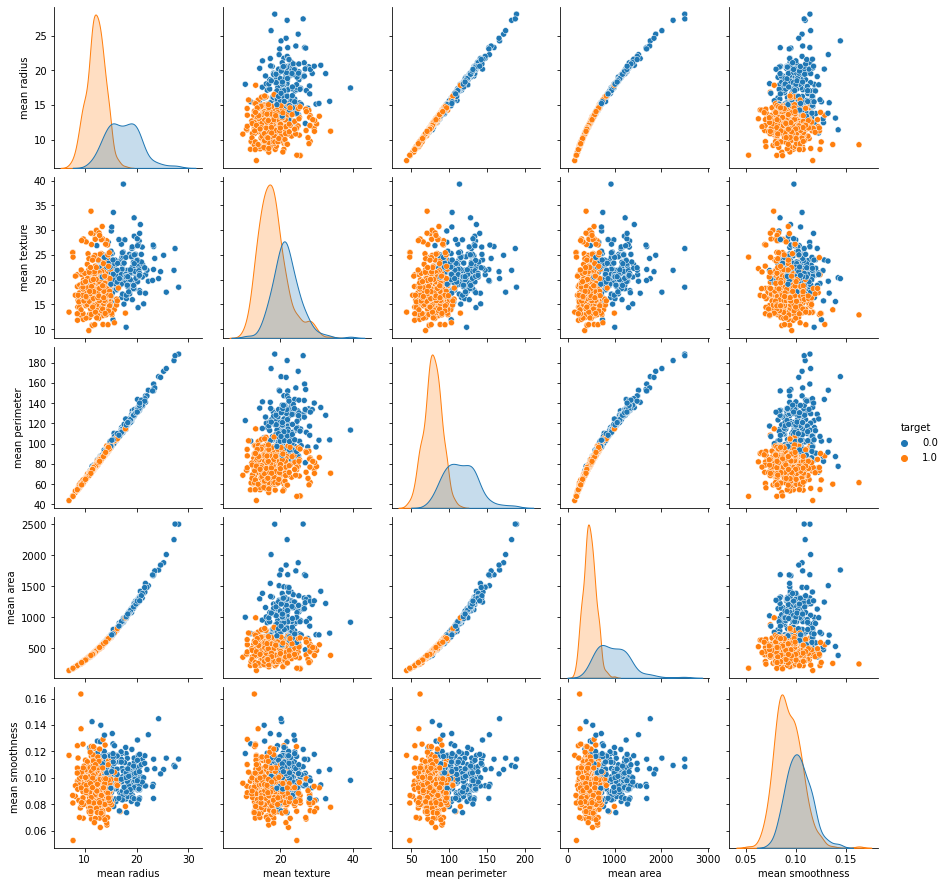

In [10]:
sns.pairplot(data=df,hue='target',vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

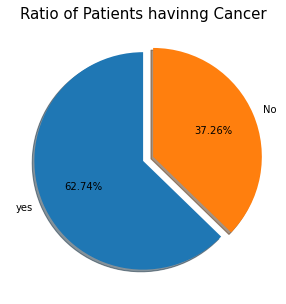

In [16]:
#count the Target Class
plt.figure(figsize=(10,5))
val=df['target'].value_counts().to_list()
col=['yes','No']
plt.title('Ratio of Patients havinng Cancer',fontsize=15)
plt.pie(x=val,labels=col,autopct='%.2f%%',shadow=True,explode=(0,.1),startangle=90)
plt.show()

In [ ]:
#heatmap for Corelation

<AxesSubplot:>

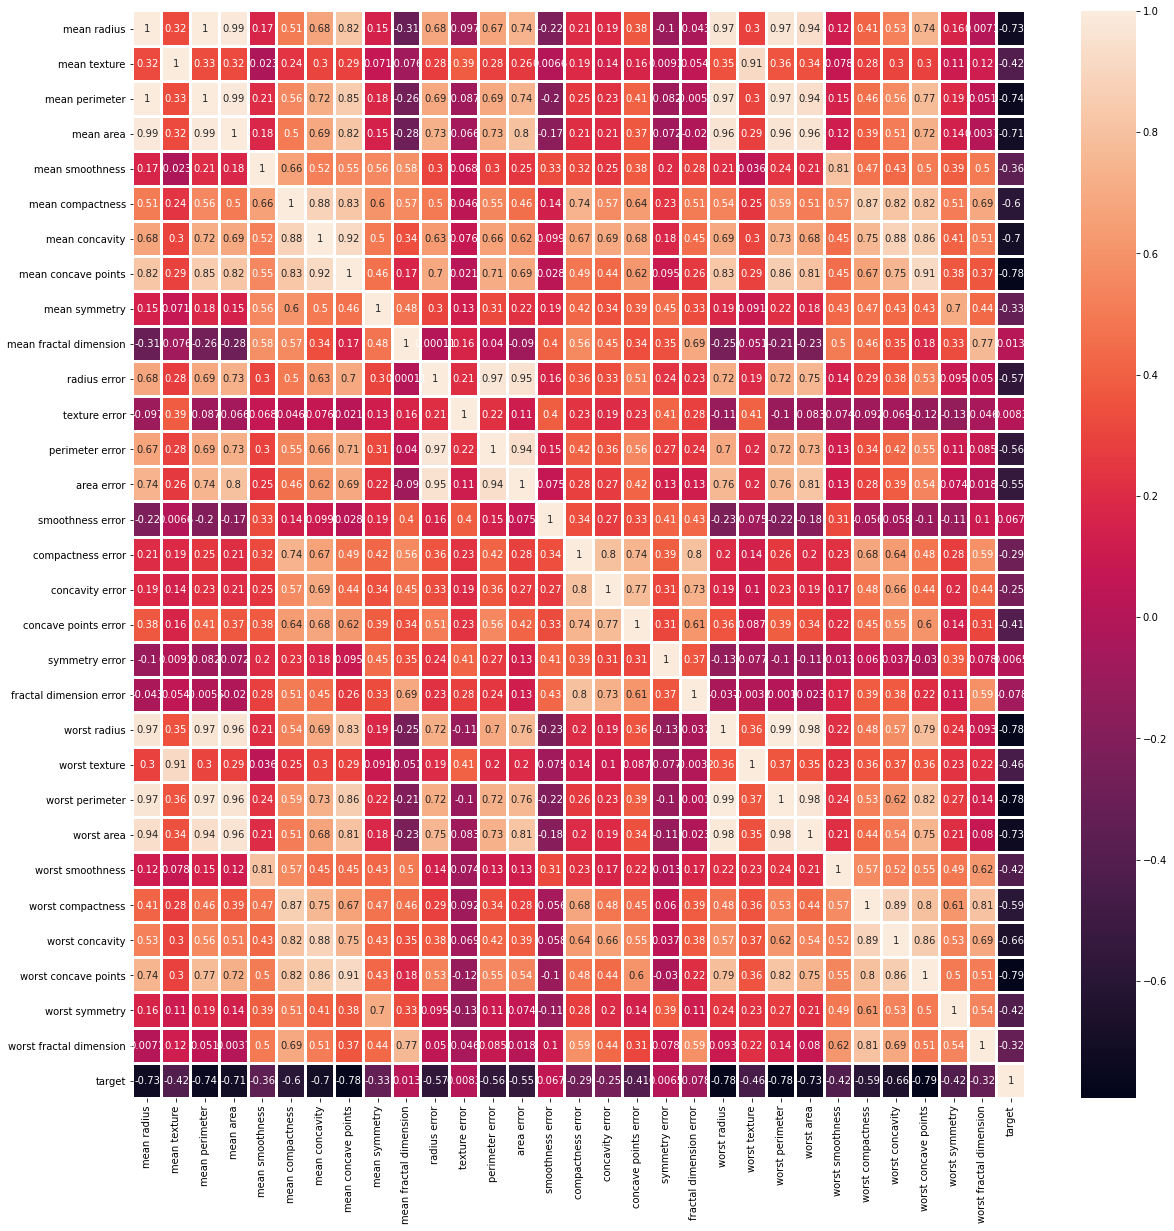

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=2)

In [23]:
df_2=df.drop(['target'],axis=1)

In [24]:
print('The shape of DF2 is:',df_2.shape)

The shape of DF2 is: (569, 30)


In [26]:
zs=df_2.columns.to_list()
zs

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [30]:
x=df_2
y=df['target']

In [31]:
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

In [32]:
##split the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)


In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 30), (143, 30), (426,), (143,))

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)


# Machine Learning Model

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
##support Vector Classifier
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train_sc,y_train)
predsvc=svc.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score: 0.9440559440559441
[[44  2]
 [ 6 91]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        46
         1.0       0.98      0.94      0.96        97

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [44]:
## without scaling
svc.fit(x_train,y_train)
predsvc_w=svc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,predsvc_w))
print(confusion_matrix(y_test,predsvc_w))
print(classification_report(y_test,predsvc_w))

Accuracy score: 0.958041958041958
[[40  6]
 [ 0 97]]
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        46
         1.0       0.94      1.00      0.97        97

    accuracy                           0.96       143
   macro avg       0.97      0.93      0.95       143
weighted avg       0.96      0.96      0.96       143



In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Lg=LogisticRegression()
Lg.fit(x_train_sc,y_train)
predlg=Lg.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))


Accuracy score: 0.958041958041958
[[44  2]
 [ 4 93]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        46
         1.0       0.98      0.96      0.97        97

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



In [39]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_sc,y_train)
preddt=dt.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))


Accuracy score: 0.9440559440559441
[[45  1]
 [ 7 90]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92        46
         1.0       0.99      0.93      0.96        97

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [40]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train_sc,y_train)
predkn=kn.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))



Accuracy score: 0.972027972027972
[[44  2]
 [ 2 95]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        46
         1.0       0.98      0.98      0.98        97

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc,y_train)
prednb=nb.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,prednb))
print(confusion_matrix(y_test,prednb))
print(classification_report(y_test,prednb))


Accuracy score: 0.9300699300699301
[[44  2]
 [ 8 89]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        46
         1.0       0.98      0.92      0.95        97

    accuracy                           0.93       143
   macro avg       0.91      0.94      0.92       143
weighted avg       0.94      0.93      0.93       143



In [42]:
## RAndom Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_sc,y_train)
predrd=rf.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,predrd))
print(confusion_matrix(y_test,predrd))
print(classification_report(y_test,predrd))

Accuracy score: 0.972027972027972
[[45  1]
 [ 3 94]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        46
         1.0       0.99      0.97      0.98        97

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [43]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()

ad.fit(x_train_sc,y_train)
predrd=ad.predict(x_test_sc)
print('Accuracy score:',accuracy_score(y_test,predrd))
print(confusion_matrix(y_test,predrd))
print(classification_report(y_test,predrd))


Accuracy score: 0.958041958041958
[[45  1]
 [ 5 92]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        46
         1.0       0.99      0.95      0.97        97

    accuracy                           0.96       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



<AxesSubplot:title={'center':'Heatmap of Confusion Matrix'}>

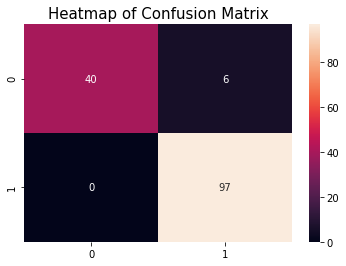

In [45]:
cm=confusion_matrix(y_test,predsvc_w)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)

# Type II error is minimum in SVC(without scaling) case, so this is the best model

# Cross-Validation of the ML Model


In [46]:
## cross validation
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(estimator=svc,X=x_train,y=y_train,cv=10)
print('Cross Validation of SVC Model:',cross_validation)
print('Cross Validation of SVC Model(in mean)',cross_validation.mean())

Cross Validation of SVC Model: [0.86046512 0.86046512 0.86046512 0.93023256 0.88372093 0.86046512
 0.95238095 0.92857143 0.92857143 0.80952381]
Cross Validation of SVC Model(in mean) 0.8874861572535991


# Now Saving This Model

In [47]:
##pickle
import pickle
filename='picklesvc.pkl'
#save model
pickle.dump(svc,open(filename,'wb'))
#load model
loaded_model=pickle.load(open(filename,'rb'))